In [5]:
library(ggplot2)
library(gridExtra)
library(gtable)
library(grid)
library(tidyr)
library(dplyr)
library(tidyverse)


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1     ✔ purrr   0.3.2
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


In [40]:
# weż dane zwykłe (nie te przygotowane do histogramu i określ funkcje trednu spadku liczby pielęgniarek po osiągnięciu wieku emerytalnego - może wziać pd uwagę kolejne 10 lat?)
  
  #http://arch.nipip.pl/attachments/article/3368/Raport_2015_NIPiP.pdf
  
  
  
# Założono brak zatrudnienia pielęgniarek i położych w wieku powyżej 70 lat. Powyżej wieku emerytalneg każda kohorta o zmienjsza swoją liczebność o 1/3 wartości sprzed osiągniecia wieku emerytlnego po 5 latach.
  
age <- c(0, 1, 2, 3)
count <- c(42498, 25463, 10164, 0)

df <- data.frame(age, count)

  
names(df) <- c("age", "count")

df


age,count
<dbl>,<dbl>
0,42498
1,25463
2,10164
3,0


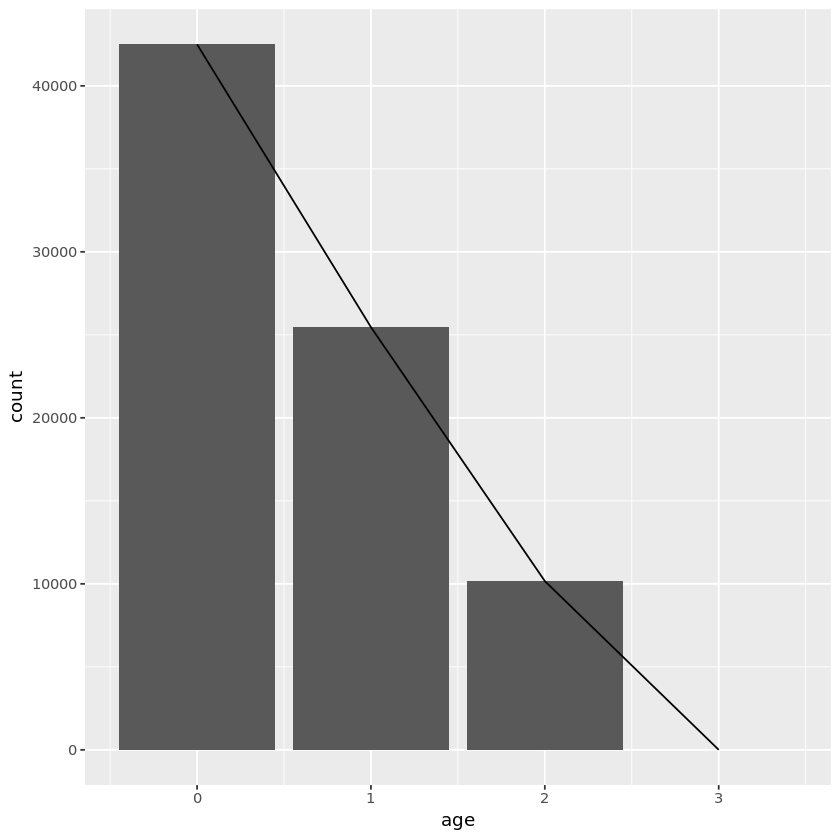

In [41]:
df %>%
    ggplot(aes(x = age, y = count)) +
    geom_col()+
    geom_line(aes(x = age, y = count))

[1] 236954

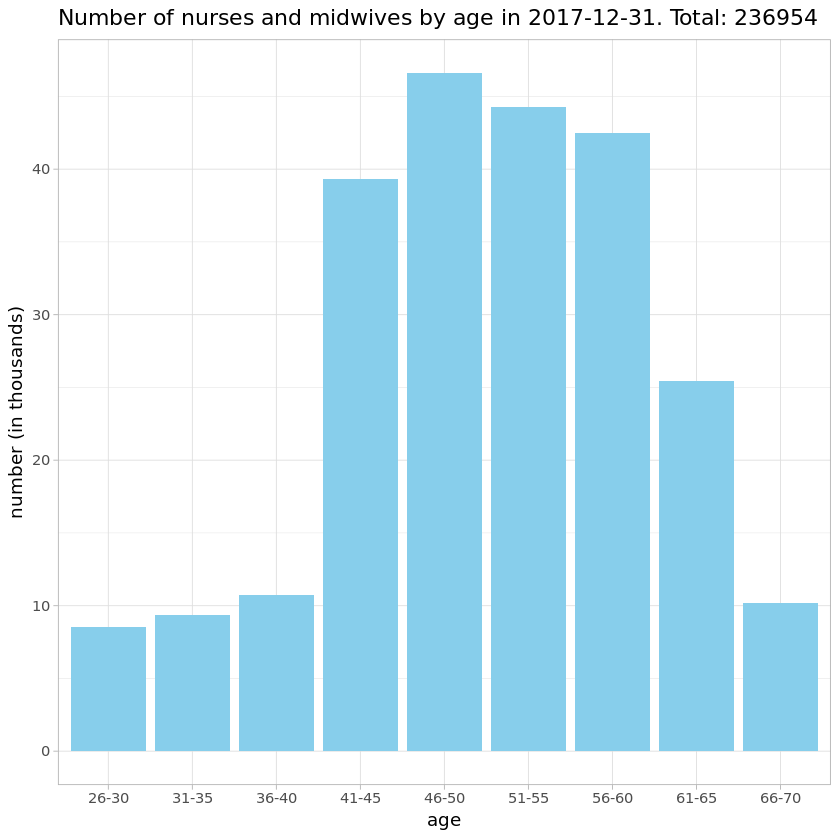

In [34]:

#stan na 12.2017
  
  
  
  age <- as.ordered(c("26-30", "31-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65", "66-70"))
  
  count <- c(8546, 9352, 10723, 39304, 46598, 44306, 42498, 25463, 10164)
  
  
  df <- data.frame(age, count)
  
  sum(df$count)
  
(plot2017 <- ggplot(df, aes(x = age, y = count)) +
  geom_col(fill= 'skyblue') +
  xlab("age") +
  ggtitle(paste("Number of nurses and midwives by age in 2017-12-31. Total:", sum(df$count), sep = " ")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme_light() +
  scale_y_continuous(name = "number (in thousands)", breaks = c(0, 10000, 20000, 30000, 40000), labels = c(0, 10, 20, 30, 40)))
  

[1] 208439

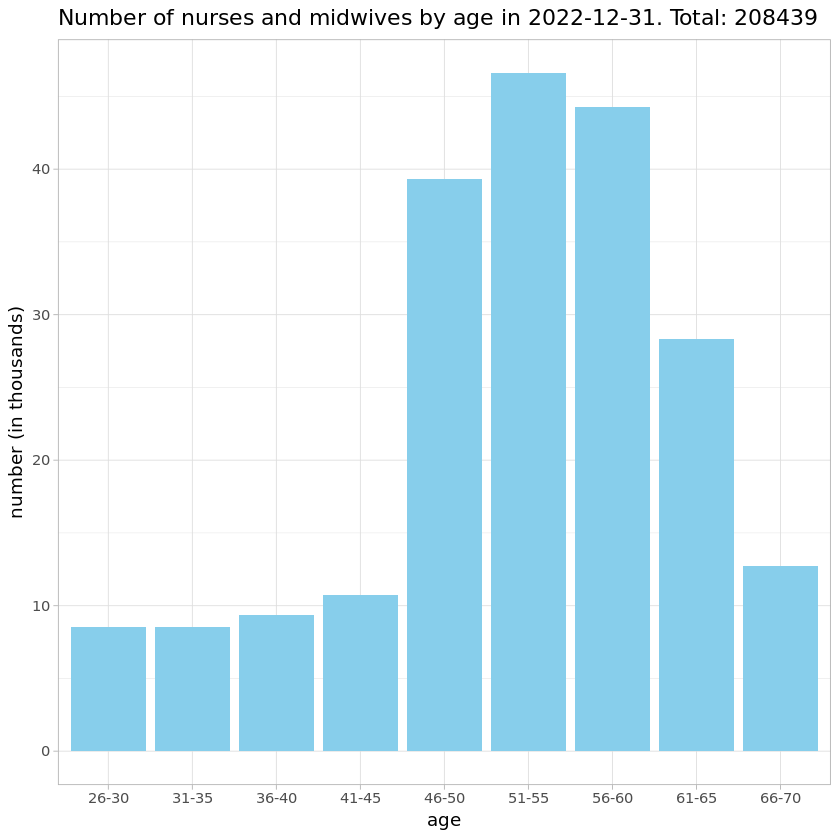

In [9]:

#stan na 12.2022 (przy założeniu identycznego przyrostu liczby nowych pielęgniarek)


df$x2023 = lag(df$count)
df[1, 'x2023'] <- df[2, 'x2023']
df[8, 'x2023'] <- round(2/3 * df[8, 'x2023'])
df[9, 'x2023'] <- round(1/2 * df[9, 'x2023'])


sum(df$x2023)


(plot2023 <- ggplot(df, aes(x = age, y = x2023)) +
  geom_col(fill= 'skyblue') +
  xlab("age") +
  ggtitle(paste("Number of nurses and midwives by age in 2022-12-31. Total:", sum(df$x2023), sep = " ")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme_light() +
  scale_y_continuous(name = "number (in thousands)", breaks = c(0, 10000, 20000, 30000, 40000), labels = c(0, 10, 20, 30, 40)))



[1] 175318

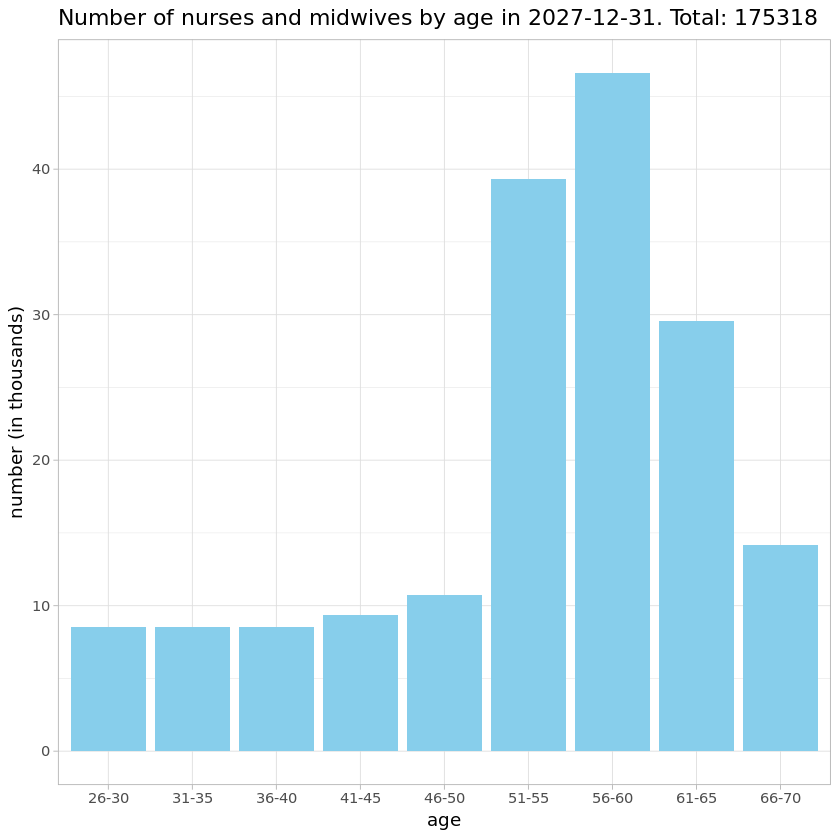

In [10]:

#stan na 12.2027

df$x2027 = lag(df$x2023)
df[1, 'x2027'] <- df[2, 'x2027']
df[8, 'x2027'] <- round(2/3 * df[8, 'x2027'])
df[9, 'x2027'] <- round(1/2 * df[9, 'x2027'])


sum(df$x2027)


(plot2027 <- ggplot(df, aes(x = age, y = x2027)) +
  geom_col(fill= 'skyblue') +
  xlab("age") +
  ggtitle(paste("Number of nurses and midwives by age in 2027-12-31. Total:", sum(df$x2027), sep = " ")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme_light() +
  scale_y_continuous(name = "number (in thousands)", breaks = c(0, 10000, 20000, 30000, 40000), labels = c(0, 10, 20, 30, 40)))



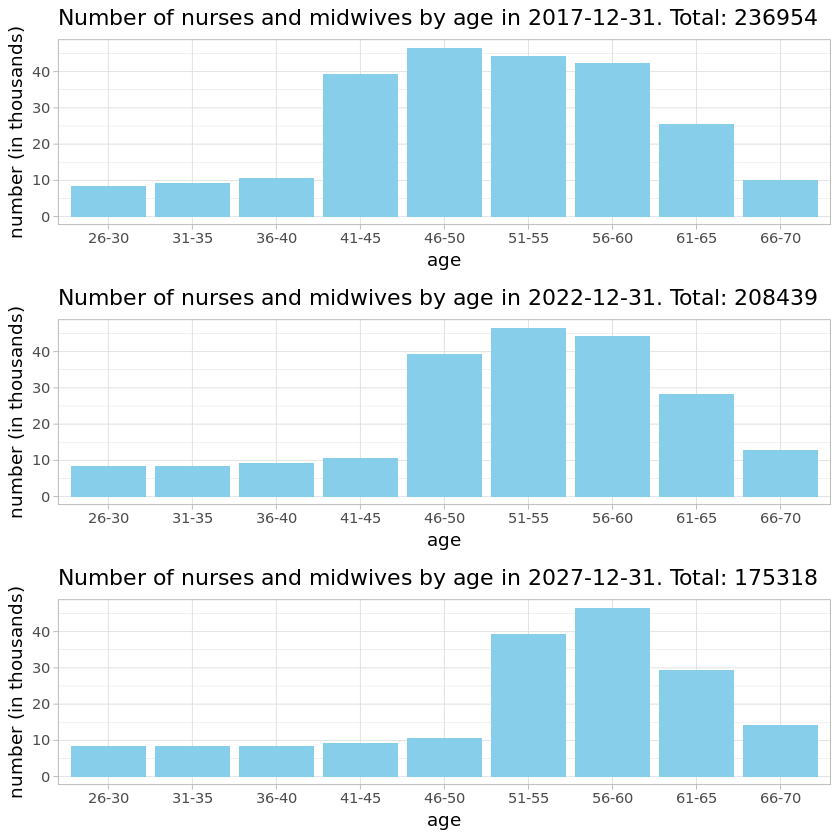

In [11]:

grid.arrange(plot2017, plot2023, plot2027, ncol=1)
